<a href="https://colab.research.google.com/github/fedassembly/tensorflow-cert-prep/blob/main/03_Convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spend 20-minutes reading and interacting with the [CNN explainer website](https://poloclub.github.io/cnn-explainer/).

What are the key terms? e.g. explain convolution in your own words, pooling in your own words

**Convolution** is the process of sliding a matrix (filter/kernel) over another matrix (eg a channel of an image) to obtain a new matrix (filtered channel of an image). One cell of the new matrix is the result of the dot product between the filter matrix and a portion of the matrix of the same size as the filter.

![](https://mlnotebook.github.io/img/CNN/convSobel.gif)

The goal of convolution is to extract features of an image. For example a one filter could extract vertical edges while another extracts horizontal edges.

![](https://media5.datahacker.rs/2018/10/edges.jpg)

**Pooling** is similar to convolution, but the actual operation is not a dot-product but rather an aggregation function like max, average or min.

![](https://mlnotebook.github.io/img/CNN/poolfig.gif)

The main goal of pooling is to reduce computations in subsequent layers by reducing the number of elements in a matrix (eg reducing the number of pixels or resolution of an image) but it can also help extract important features (max pooling). One side-effect of pooling is the reduction of the number of parameters, which may help reduce overfitting, although it's not considered a regularization technique like adding dropout layers.

![](https://blog.paperspace.com/content/images/2022/07/maxpooled_1-1.png)

Play around with the "understanding hyperparameters" section in the CNN explainer website for 10-minutes.

What is the kernel size?

Kernel size is the shape of the kernel/filter. The size of the kernel impacts two things:
- how much information is extracted from a image (smaller the kernel, the more information is extracted)
- the size of the output image (smaller the kernel, the more the output image is similar in size to the input image)

Smaller kernel sizes allow for deeper networks.

What is the stride?



The stride controls the number of steps the kernel as it slides over the image. Stride has a similar impact as the kernel size.
- smaller the stride, the more information is extracted
- smaller the stride, the more the output image is similar in size to the input image

How could you adjust each of these in TensorFlow code?


They are arguments in `tf.kearas.layers.Conv2D`

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

`kernel_size`	An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.

`strides`	An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.

Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.


In [1]:
!rm -rf /content/images/
!mkdir -p /content/images/{guitar,drums,trumpet}
!wget -q -P /content/images/guitar \
 'https://static.toiimg.com/thumb/msid-86937496,width-1280,resizemode-4/86937496.jpg' \
 'https://assets.yousician.com/app/uploads/2021/02/15152144/learn-guitar-1-1000x1000.jpg' \
 'https://www.insure4music.co.uk/media/p14mt4xo/istock-1056444080.jpg' \
 'https://assets.yousician.com/app/uploads/2022/05/05130122/yousician-educational-photography-21-1024x683.jpg' \
 'https://cdn.shopify.com/s/files/1/0058/9873/1587/products/DSC2496-Edit___20191001_1024x1024.jpg' \
 'https://pocketmagscovers.imgix.net/guitar-player-magazine-march-2023-cover.jpg' \
 'https://www.thoughtco.com/thmb/OjaF_zxzYbnoncdfXtV5JE_PBy4=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-186459142-5c251e3946e0fb0001d607a4.jpg' \
 'https://upload.wikimedia.org/wikipedia/commons/3/37/Steel_guitar.jpg' \
 'https://static01.nyt.com/images/2020/09/08/fashion/08guitar-taylor-swift/08guitar-taylor-swift-mediumSquareAt3X-v2.jpg' \
 'https://i.ytimg.com/vi/e26zZ83Oh6Y/maxresdefault.jpg' \
 'https://www.native-instruments.com/typo3temp/pics/img-welcome-hero-guitar-rig-6-player-product-page-01-hero-v2-8c04bb712c562230a837e56511c10f1d-m@2x.jpg' \
 'https://i0.wp.com/acousticguitar.com/wp-content/uploads/2022/03/biz-card-under-strings-e1646432233815.jpg' \
 'https://www.expertreviews.co.uk/sites/expertreviews/files/2018/04/electricguitardude_0.jpg' \
 'https://i.ytimg.com/vi/Anop2dCuR2g/maxresdefault.jpg' \
 'https://cdn.shopify.com/s/files/1/1434/2352/t/11/assets/slideshow_4_1200x.jpg' \
 'https://www.ibanez.com/eu/news_file/file/fp_ichikapick.jpg'
!wget -q -P /content/images/drums \
 'https://storage.googleapis.com/stateless-blog-g4m-co-uk/2023/03/Featured-image-best-drum-set-brands.jpg' \
 'https://images.squarespace-cdn.com/content/v1/55524b6ce4b02fc9d3e73f42/0928aa64-30b4-4c91-91f5-7d6c696f47df/stock-24.jpg' \
 'https://schoolofrock.imgix.net/img/news-article-hero-750w/beginning-drums2-1645469645.jpg' \
 'https://i.ytimg.com/vi/XP98nr6qOw4/maxresdefault.jpg' \
 'https://cdn.shopify.com/s/files/1/0970/0050/files/image4_bd4316cb-ffb4-4f2f-b044-2a5881c17f88.jpg' \
 'https://cdn.musichouseschool.com/KidHandsPlayingDrumswithSoundPads.jpg' \
 'https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/01/327279_1100-1100x628.jpg' \
 'https://www.protoolreviews.com/wp-content/uploads/2023/03/Yamaha-DTX6-Electronic-Drums.jpg' \
 'https://www.datocms-assets.com/17746/1603354938-drum3.jpg' \
 'https://www.allianz.co.uk/personal-insurance/musical-insurance/drums-and-percussion/_jcr_content/root/stage/stageimage.img.82.3360.jpeg/1605883186325/drums-stage-desktop-girl.jpeg' \
 'https://images.squarespace-cdn.com/content/v1/57f66a16e4fcb5154dc8ba39/d78b2199-f60e-4e35-9c89-96f66fb05f0b/unsplash-image-JAIwTWU4lVU.jpg' \
 'https://www.icmp.ac.uk/sites/default/files/styles/news_details/public/jon_harris_icmp_profile__0.jpg' \
 'https://stevenslatedrums.com/wp-content/uploads/2020/03/SSD-5.5-Kit-Edit-Window-web.jpeg' \
 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Visulite.jpg/640px-Visulite.jpg' \
 'https://d3stsh1547n2ng.cloudfront.net/banner/poster.jpg' \
 'https://assets.xlnaudio.com/pages/addictive_drums/new/Hero-Modern-Soul-800px.jpg'
!wget -q -P /content/images/trumpet \
 'https://i.ytimg.com/vi/LpHx7xKOEpM/maxresdefault.jpg' \
 'https://www.musicalhow.com/wp-content/uploads/featured-types-trumpets.jpg' \
 'https://media.npr.org/assets/img/2022/12/22/im1-dca4c5d9cfca82484dcffe869df9f19929337f1e.jpg' \
 'https://www.rollingstone.com/wp-content/uploads/2020/09/GettyImages-96410285.jpg' \
 'https://assets.classicfm.com/2017/01/trumpet-v4r-1483624906-editorial-long-form-0.jpg' \
 'https://media.gq-magazine.co.uk/photos/5d13a0e458bc1c415cface8b/4:3/w_1704,h_1278,c_limit/Miles-Davis-GQ-22Aug16_getty_b.jpg' \
 'https://mynewmicrophone.com/wp-content/uploads/2022/01/mnm_Top_11_Benefits_Of_Learning__Playing_Trumpet_large.jpg' \
 'https://middermusic.com/wp-content/uploads/2021/07/best-online-trumpet-lessons.jpg' \
 'https://files.ekmcdn.com/stgilesmusic/images/boosey-hawkes-trumpet-sold-10384-p.jpg' \
 'https://ichef.bbci.co.uk/images/ic/480xn/p08b2wnl.jpg' \
 'https://images.immediate.co.uk/production/volatile/sites/24/2022/10/trumpet-guide-f931134.jpg' \
 'https://tf-cmsv2-smithsonianmag-media.s3.amazonaws.com/filer/20/59/20593506-ce49-4ba7-958b-db1ba490f2d3/dizzy_gillespie_giants_of_jazz_1973_dia0006.jpg' \
 'https://hellomusictheory.com/wp-content/uploads/2021/09/Louis-Armstrong.jpeg' \
 'https://www.tutoring-blog.co.uk/wp-content/uploads/2023/05/trumpet-scaled.jpg' \
 'https://b2380825.smushcdn.com/2380825/wp-content/uploads/2016/04/tromhome1-scaled.jpg' \
 'https://cdn.shopify.com/s/files/1/0557/0556/7432/articles/AdobeStock_90220878_46a10700-6fe3-4bb1-a16a-049da574633e.jpg'
!cd /content/images/guitar && ls -v | cat -n | while read n f; do mv -n "$f" `printf "%02d.jpg" $n`; done
!cd /content/images/drums && ls -v | cat -n | while read n f; do mv -n "$f" `printf "%02d.jpg" $n`; done
!cd /content/images/trumpet && ls -v | cat -n | while read n f; do mv -n "$f" `printf "%02d.jpg" $n`; done

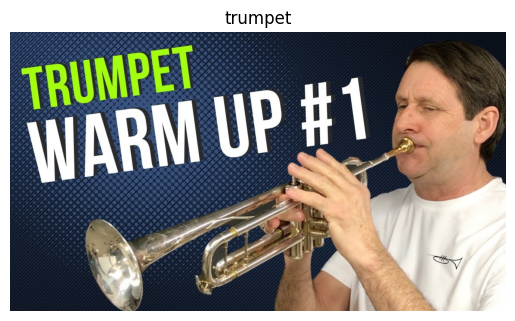

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
from pathlib import Path

files = []
p = Path("/content/images/")
for i in p.glob("**/*.jpg"):
     files.append(i)

f = random.choice(files)
img = mpimg.imread(f)
plt.title(f.parent.name)
plt.imshow(img)
plt.axis("off")
plt.show()

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

class_names = ["guitar", "drums", "trumpet"]
train_ds, val_ds = image_dataset_from_directory(
    "/content/images/",
    labels="inferred",
    label_mode="int", # sparse_categorical_crossentropy
    class_names=class_names,
    batch_size=4,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="both",
    crop_to_aspect_ratio=False,
)

Found 46 files belonging to 3 classes.
Using 37 files for training.
Using 9 files for validation.


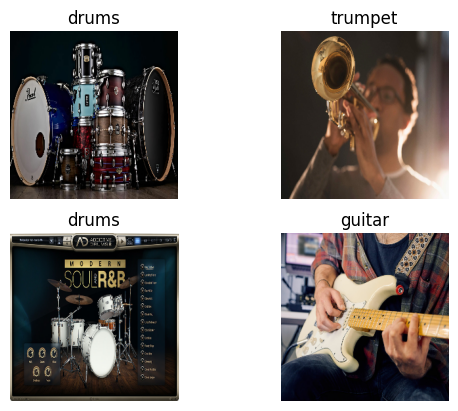

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling

def plot_one_batch_from_dataset(dataset, model):
  for images, labels in dataset.take(1):
    for i in range(4):
      ax = plt.subplot(2, 2, i + 1)
      plt.imshow(model(images[i]))
      plt.title(dataset.class_names[labels[i]])
      plt.axis("off")

model = Sequential([Rescaling(1./255.)])
plot_one_batch_from_dataset(train_ds, model)

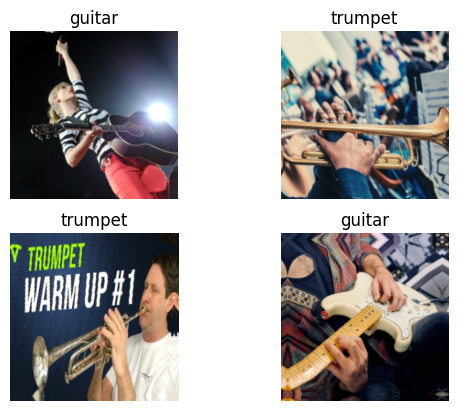

In [5]:
from tensorflow.keras.layers import RandomRotation, RandomFlip, RandomZoom

model = Sequential([
    Rescaling(1./255.),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
])
plot_one_batch_from_dataset(train_ds, model)

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

tf.random.set_seed(42)

model = Sequential([
    Rescaling(1./255., input_shape=(256, 256, 3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),

    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2, 2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2, 2),
    Flatten(),
    Dense(3, activation="softmax")
])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_rotation_1 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_1 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 10)      910       
                                                      

In [7]:
model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
10/10 [==============================] - 13s 139ms/step - loss: 1.1184 - accuracy: 0.3784 - val_loss: 1.2654 - val_accuracy: 0.2222
Epoch 2/30
10/10 [==============================] - 1s 23ms/step - loss: 1.0572 - accuracy: 0.3784 - val_loss: 1.1193 - val_accuracy: 0.3333
Epoch 3/30
10/10 [==============================] - 1s 35ms/step - loss: 1.0736 - accuracy: 0.4324 - val_loss: 1.4178 - val_accuracy: 0.2222
Epoch 4/30
10/10 [==============================] - 1s 53ms/step - loss: 1.0004 - accuracy: 0.4595 - val_loss: 1.4891 - val_accuracy: 0.2222
Epoch 5/30
10/10 [==============================] - 1s 27ms/step - loss: 1.0294 - accuracy: 0.4865 - val_loss: 1.1206 - val_accuracy: 0.4444
Epoch 6/30
10/10 [==============================] - 1s 24ms/step - loss: 1.0202 - accuracy: 0.4595 - val_loss: 1.2644 - val_accuracy: 0.3333
Epoch 7/30
10/10 [==============================] - 1s 31ms/step - loss: 0.8748 - accuracy: 0.6486 - val_loss: 1.8216 - val_accuracy: 0.3333
Epoch 8/30


1/1 [==============================] - 0s 103ms/step


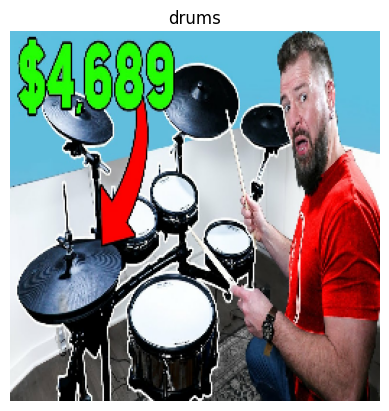

In [8]:
f = random.choice(files)
img = tf.io.read_file(str(f))
img = tf.image.decode_image(img, channels=3)
img = tf.image.resize(img, size=(model.input_shape[1], model.input_shape[2]))
img = tf.expand_dims(img, axis=0)
pred = model.predict(img)
plt.imshow(img[0].numpy().astype("uint8"))
plt.axis("off")
plt.title(train_ds.class_names[tf.argmax(pred, axis=1)[0]])
plt.show()

Find an ideal learning rate for a simple convolutional neural network model on the 10 class dataset.

In [9]:
!rm -rf /content/10_food_classes_all_data.zip /content/10_food_classes_all_data /content/__MACOSX
!wget -q -P /content https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
!unzip -q 10_food_classes_all_data.zip -d /content
!rm -rf /content/__MACOSX

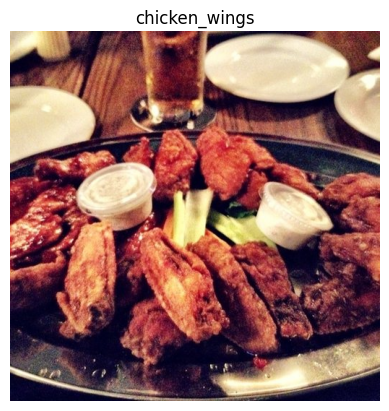

In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
from pathlib import Path

files = []
p = Path("/content/10_food_classes_all_data")
for i in p.glob("**/*.jp*g"):
     files.append(i)

f = random.choice(files)
img = mpimg.imread(f)
plt.title(f.parent.name)
plt.imshow(img)
plt.axis("off")
plt.show()

In [11]:
import os

class_names = os.listdir("/content/10_food_classes_all_data/train")
class_names

['sushi',
 'hamburger',
 'ramen',
 'grilled_salmon',
 'pizza',
 'ice_cream',
 'fried_rice',
 'chicken_wings',
 'steak',
 'chicken_curry']

In [12]:
class_counts = {"train": dict.fromkeys(class_names, 0), "test": dict.fromkeys(class_names, 0)}
for i in p.glob("**/*.jp*g"):
  class_counts[i.parent.parent.name][i.parent.name] += 1
class_counts

{'train': {'sushi': 750,
  'hamburger': 750,
  'ramen': 750,
  'grilled_salmon': 750,
  'pizza': 750,
  'ice_cream': 750,
  'fried_rice': 750,
  'chicken_wings': 750,
  'steak': 750,
  'chicken_curry': 750},
 'test': {'sushi': 250,
  'hamburger': 250,
  'ramen': 250,
  'grilled_salmon': 250,
  'pizza': 250,
  'ice_cream': 250,
  'fried_rice': 250,
  'chicken_wings': 250,
  'steak': 250,
  'chicken_curry': 250}}

In [13]:
from tensorflow.keras.utils import image_dataset_from_directory

train_ds, val_ds = image_dataset_from_directory(
    "/content/10_food_classes_all_data/train",
    labels="inferred",
    label_mode="int", # sparse_categorical_crossentropy
    class_names=class_names,
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="both",
    crop_to_aspect_ratio=False,
)

Found 7500 files belonging to 10 classes.
Using 6000 files for training.
Using 1500 files for validation.


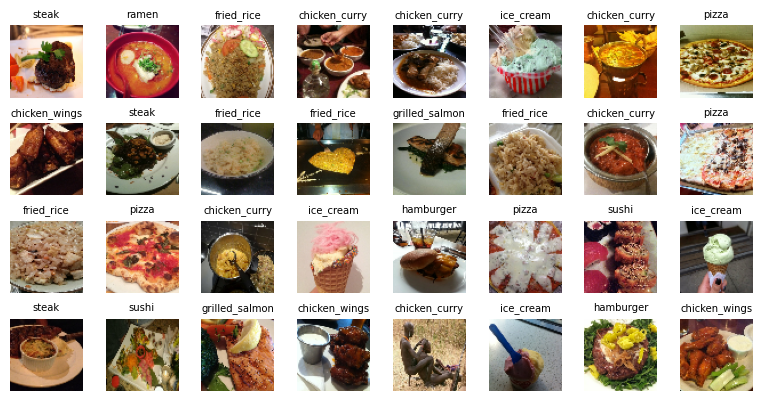

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling

@plt.rc_context({"font.size": 6, "figure.figsize": [8, 4]})
def plot_one_batch_from_dataset(dataset, model):
  for images, labels in dataset.take(1):
    for i in range(32):
      ax = plt.subplot(4, 8, i + 1)
      plt.imshow(model(images[i]))
      plt.title(dataset.class_names[labels[i]])
      plt.axis("off")
      plt.tight_layout()

model = Sequential([Rescaling(1./255.)])
plot_one_batch_from_dataset(train_ds, model)

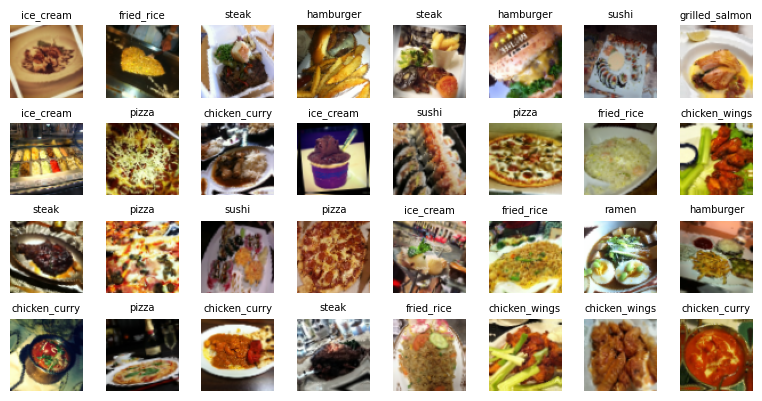

In [15]:
tf.random.set_seed(42)

model = Sequential([
    Rescaling(1./255.),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
])
plot_one_batch_from_dataset(train_ds, model)

In [16]:
tf.random.set_seed(42)

model = Sequential([
    Rescaling(1./255., input_shape=(64, 64, 3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2, 2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2, 2),
    Flatten(),
    Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.build()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 random_flip_3 (RandomFlip)  (None, 64, 64, 3)         0         
                                                                 
 random_rotation_3 (RandomR  (None, 64, 64, 3)         0         
 otation)                                                        
                                                                 
 random_zoom_3 (RandomZoom)  (None, 64, 64, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 10)        280       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 10)        910       
                                                      

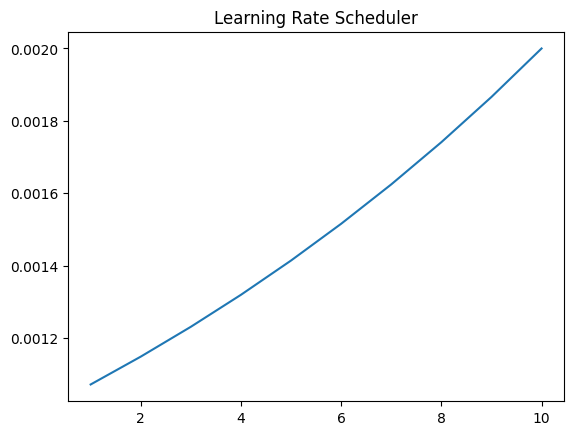

In [17]:
import numpy as np

epoch = np.arange(1, 11)
lr = 1e-3 * 4**(epoch/20)

plt.plot(epoch, lr)
plt.title("Learning Rate Scheduler");

In [18]:
from tensorflow.keras.callbacks import LearningRateScheduler

lr_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * 4**(epoch/20))

history = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[lr_scheduler])

Epoch 1/20
188/188 [==============================] - 12s 47ms/step - loss: 2.1733 - accuracy: 0.1948 - val_loss: 2.1102 - val_accuracy: 0.2487 - lr: 0.0010
Epoch 2/20
188/188 [==============================] - 11s 57ms/step - loss: 2.0173 - accuracy: 0.2755 - val_loss: 2.0618 - val_accuracy: 0.2880 - lr: 0.0011
Epoch 3/20
188/188 [==============================] - 10s 51ms/step - loss: 1.9588 - accuracy: 0.3162 - val_loss: 2.0295 - val_accuracy: 0.2933 - lr: 0.0011
Epoch 4/20
188/188 [==============================] - 10s 50ms/step - loss: 1.9222 - accuracy: 0.3327 - val_loss: 1.9916 - val_accuracy: 0.2920 - lr: 0.0012
Epoch 5/20
188/188 [==============================] - 9s 44ms/step - loss: 1.8918 - accuracy: 0.3348 - val_loss: 1.9758 - val_accuracy: 0.3080 - lr: 0.0013
Epoch 6/20
188/188 [==============================] - 10s 51ms/step - loss: 1.8654 - accuracy: 0.3520 - val_loss: 1.9942 - val_accuracy: 0.2993 - lr: 0.0014
Epoch 7/20
188/188 [==============================] - 10s 5

Text(0.5, 1.0, 'Validation Loss vs Learning Rate')

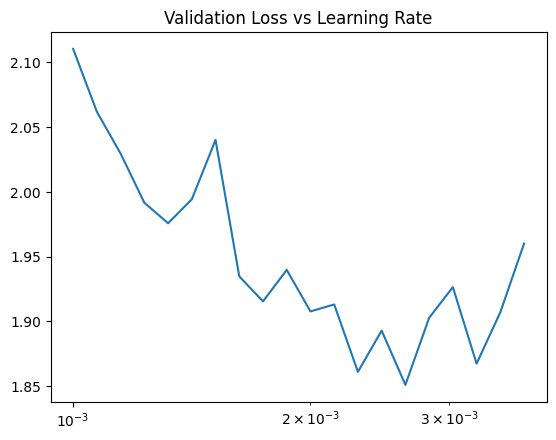

In [19]:
plt.semilogx(history.history["lr"], history.history["val_loss"])
plt.title("Validation Loss vs Learning Rate")

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import clone_model

new_model = clone_model(model)
new_model.compile(optimizer=Adam(learning_rate=0.0025), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = new_model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
188/188 [==============================] - 13s 57ms/step - loss: 2.3034 - accuracy: 0.0982 - val_loss: 2.3030 - val_accuracy: 0.1160
Epoch 2/20
188/188 [==============================] - 10s 51ms/step - loss: 2.3039 - accuracy: 0.1022 - val_loss: 2.3036 - val_accuracy: 0.0853
Epoch 3/20
188/188 [==============================] - 9s 45ms/step - loss: 2.3029 - accuracy: 0.1037 - val_loss: 2.3040 - val_accuracy: 0.0853
Epoch 4/20
188/188 [==============================] - 9s 47ms/step - loss: 2.3029 - accuracy: 0.1037 - val_loss: 2.3041 - val_accuracy: 0.0853
Epoch 5/20
188/188 [==============================] - 10s 51ms/step - loss: 2.3029 - accuracy: 0.1037 - val_loss: 2.3040 - val_accuracy: 0.0853
Epoch 6/20
188/188 [==============================] - 10s 51ms/step - loss: 2.3018 - accuracy: 0.1058 - val_loss: 2.2903 - val_accuracy: 0.1200
Epoch 7/20
188/188 [==============================] - 8s 43ms/step - loss: 2.2329 - accuracy: 0.1722 - val_loss: 2.2125 - val_accuracy: 0.

In [21]:
from tensorflow.keras.initializers import Constant

tf.random.set_seed(42)

fi = np.array(list(class_counts["train"].values()))

model = Sequential([
    Rescaling(1./255., input_shape=(64, 64, 3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2, 2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2, 2),
    Flatten(),
    Dense(10, activation="softmax", bias_initializer=Constant(np.log(fi / np.sum(fi))))
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [22]:
results = model.evaluate(train_ds, verbose=0)
print("Loss: {:0.4f}".format(results[0]))
print("Expected loss @ init: {:0.4f}".format(np.log(len(class_names))))

Loss: 2.3293
Expected loss @ init: 2.3026


In [23]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
188/188 [==============================] - 12s 52ms/step - loss: 2.1896 - accuracy: 0.1797 - val_loss: 2.1191 - val_accuracy: 0.2213
Epoch 2/20
188/188 [==============================] - 11s 57ms/step - loss: 2.0276 - accuracy: 0.2823 - val_loss: 2.0576 - val_accuracy: 0.2800
Epoch 3/20
188/188 [==============================] - 10s 50ms/step - loss: 1.9658 - accuracy: 0.3053 - val_loss: 2.0104 - val_accuracy: 0.2933
Epoch 4/20
188/188 [==============================] - 9s 44ms/step - loss: 1.9329 - accuracy: 0.3220 - val_loss: 2.0153 - val_accuracy: 0.2993
Epoch 5/20
188/188 [==============================] - 10s 51ms/step - loss: 1.9147 - accuracy: 0.3243 - val_loss: 1.9772 - val_accuracy: 0.3007
Epoch 6/20
188/188 [==============================] - 10s 51ms/step - loss: 1.8944 - accuracy: 0.3407 - val_loss: 1.9877 - val_accuracy: 0.3033
Epoch 7/20
188/188 [==============================] - 9s 49ms/step - loss: 1.8725 - accuracy: 0.3457 - val_loss: 1.9372 - val_accuracy: 0